In [1]:
import pandas as pd

In [2]:
pd_ratings = pd.read_csv('yf_dianping/ratings.csv')

print('用户 数目：%d' % pd_ratings.userId.unique().shape[0])
print('评分/评论 数目（总计）：%d\n' % pd_ratings.shape[0])

print('总体 评分 数目（[1,5]）：%d' % pd_ratings[(pd_ratings.rating>=1) & (pd_ratings.rating<=5)].shape[0])
print('环境 评分 数目（[1,5]）：%d' % pd_ratings[(pd_ratings.rating_env>=1) & (pd_ratings.rating_env<=5)].shape[0])
print('口味 评分 数目（[1,5]）：%d' % pd_ratings[(pd_ratings.rating_flavor>=1) & (pd_ratings.rating_flavor<=5)].shape[0])
print('服务 评分 数目（[1,5]）：%d' % pd_ratings[(pd_ratings.rating_service>=1) & (pd_ratings.rating_service<=5)].shape[0])
print('评论 数目：%d' % pd_ratings[~pd_ratings.comment.isna()].shape[0])

用户 数目：542706
评分/评论 数目（总计）：4422473

总体 评分 数目（[1,5]）：3293878
环境 评分 数目（[1,5]）：4076220
口味 评分 数目（[1,5]）：4093819
服务 评分 数目（[1,5]）：4076220
评论 数目：4107409


### 字段说明

| 字段 | 说明 |
| ---- | ---- |
| id | 每条评论的数字标记(唯一) |
| userId | 用户 id (从 0 开始，连续编号) |
| restId | 即 restaurants.csv 中的 restId |
| rating | 总体评分，[0,5] 之间的整数 |
| rating_env | 环境评分，[1,5] 之间的整数 |
| rating_flavor | 口味评分，[1,5] 之间的整数 |
| rating_service | 服务评分，[1,5] 之间的整数 |
| timestamp | 评分时间戳 |
| comment |  评论内容 |

In [4]:
pd_ratings.sample(10)

,userId,restId,rating,rating_env,rating_flavor,rating_service,timestamp,comment
1061692,73742,59718,4.0,3.0,4.0,3.0,1289992320000,地理位置挺好的，里面东西的种类也很丰富\n环境有点杂乱，但是有几次进去逛逛里面的花还是摆的蛮...
3229427,116855,179340,4.0,3.0,3.0,3.0,1321192200000,就在我们住的第一家旅馆对面，走个过街天桥就是，很方便。我们是下午3点到的，仍然营业，大厅里包...
4208029,82860,230539,4.0,3.0,4.0,3.0,1295415300000,2010年最后一天，还是得加班...\n加完班，风大又饥肠辘辘，于是就近选了这家最近的又让人...
2933253,401514,158432,NaN,2.0,2.0,2.0,1211271660000,不久以前刚开的一家好利来分店~~~\n 本身不太去好利来的，但是因为周边再没有第二家还可以的...
3774917,29516,208349,3.0,2.0,3.0,2.0,1318492140000,我反正是觉得好吃的，怪味面有点酸甜味，里面好像是有海味面的绍子，还有像肘子一样的肥肉坨坨，我...
2233606,8110,123284,4.0,4.0,4.0,4.0,1316747700000,人均不太准，因为每次吃饭我都不知道花了多少钱~\n喜欢吃他家的鸡丁茄子煲~\n菜品种类挺丰富...
856460,27369,46998,3.0,NaN,NaN,NaN,1325156580000,NaN
3921830,95958,214222,NaN,3.0,3.0,3.0,1228992420000,猪肚包鸡真的不是浪得虚名，跟家人专门去吃，都是值得的，汤好喝，但是分量有点少，而且配料价格有...
191859,1959,6730,4.0,4.0,3.0,4.0,1308806640000,我比较喜欢银泰的西湖店，因为店面大，而人流量不多，特别是血拼的时候，不用排很长的队，唯一美中...
3162271,13093,176340,5.0,4.0,3.0,4.0,1293070320000,每周一、三、五、六都有乐队活动\n周三的女士之夜女士免费的，周五100畅饮，都还蛮划算的~\...


### 剔除NaN所在的行

In [7]:
new_ratings = pd_ratings.dropna(axis=0, how='any')
new_ratings.sample(10)

,userId,restId,rating,rating_env,rating_flavor,rating_service,timestamp,comment
3331206,17431,183719,4.0,4.0,4.0,4.0,1273153380000,屈臣氏的化妆品种类很多\n我用过的有洗面奶，喷雾和面膜 ***素 就给你说说我的感受吧\n屈...
1164857,145801,62740,4.0,2.0,2.0,2.0,1291726080000,老鸭粉丝汤全上海好像有很多，叫游子的也不少，分不清哪家正宗，哪家山寨。老鸭粉丝汤里面有鸭肫，...
4382863,447118,241887,5.0,3.0,4.0,3.0,1273618980000,去了就是因为想吃粥了，毕竟有的粥在家是做不出那个味的，而且弄起来也很麻烦。点了皮蛋瘦肉粥，要...
4402027,335423,242539,2.0,2.0,1.0,2.0,1267703460000,很早就看到大眾上面點評的這家店。特意跑過去嘗試了下 。和BF點了一甜一鹹2碗豆漿。 額。。。...
2861491,10138,155193,4.0,3.0,3.0,2.0,1297393800000,也是到了中午就生意爆好的地方。本身位子就不多。\n一般要等15-20分钟上菜。\n不定期会有...
1402427,71844,76587,3.0,2.0,2.0,2.0,1273214880000,装修很一般，菜有点辣但是难以流下深刻的印象。虽说号称湖南菜，但感觉还是像赣菜。咸得厉害……太...
841739,259972,45486,1.0,1.0,1.0,1.0,1276148940000,非常难吃，爆肚，肚仁。。上来有一阵非常臭的味道跟服务员说，得来的问答是，“你别闻它就点麻将吃...
4202791,64550,230146,3.0,2.0,2.0,2.0,1279269180000,新店开业菜品打五折~~人那叫一个多~~本来新商场就有味道，加上这家店在地下，通风不太好，弄的...
43155,32439,1075,5.0,2.0,4.0,4.0,1278183060000,好久没遇上愿意再次光顾的餐厅了呃~\n也好久没受到过全程微笑的服务了呃~\n更好久没有吃到好...
1918467,188311,103396,3.0,3.0,3.0,2.0,1324742580000,看点评上很多人都说不错就来试试 觉得很一般 很多人推荐的皮蛋瘦肉粥真的很不好 料很少 桂圆红...


In [11]:
len(new_ratings)

2683104

In [8]:
new_ratings.columns

Index(['userId', 'restId', 'rating', 'rating_env', 'rating_flavor',
       'rating_service', 'timestamp', 'comment'],
      dtype='object')

In [14]:
new_ratings.dtypes

userId              int64
restId              int64
rating            float64
rating_env        float64
rating_flavor     float64
rating_service    float64
timestamp           int64
comment            object
label             float64
dtype: object

In [15]:
new_ratings["label"][new_ratings["rating"] >= 3.0] = 1.0
new_ratings["label"][new_ratings["rating"] < 3.0] = 0.0

E:\Anaconda\details\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\details\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\Anaconda\details\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\Anaconda\deta

In [18]:
new_ratings.sample(10)

,userId,restId,rating,rating_env,rating_flavor,rating_service,timestamp,comment,label
3466290,495271,188351,3.0,2.0,2.0,2.0,1315902360000,有次同学聚会去了，还可以吧，就是由于人多了，不点饭的话实在是不能当晚饭来吃，不过那个五花肉确...,1.0
744948,17326,38183,2.0,2.0,1.0,1.0,1282659060000,想到这家麦当劳就很气。那天中午我实在太热啦，就选择和朋友吃M记凑活一下吧。\n 点餐时...,0.0
2284166,54677,124811,4.0,5.0,3.0,3.0,1267014180000,去厦门找朋友玩去吃的\n咖喱蟹很好吃~~配饭吃很香...\n我不爱吃饭的人都把饭吃了大半\n...,1.0
2673430,102609,148272,4.0,5.0,4.0,4.0,1325601780000,开张以来一直不旺，国营作风，不屑宣传。里面的商品和食肆虽不算高档，但也符合当地消费。今天是元...,1.0
380122,162876,21003,2.0,2.0,3.0,1.0,1326967440000,很少会给那么低的评价 实在因为避风塘的服务态度不是一般差 跑到那家店服务员素质都是一副欠多还...,0.0
1539674,12431,85641,3.0,4.0,3.0,3.0,1307024220000,在三号线殷高西路站旁边，店里面的环境很不错的，服务态度也不错。这里的面都和笋有关系，辣肉笋丁...,1.0
3881214,14926,213041,4.0,3.0,3.0,3.0,1292156880000,做好足浴本来想去whisk尝试一下里面的巧克力制品，结果么有位了，要等很久，未知，那么继续前...,1.0
3171221,43221,176443,3.0,2.0,2.0,3.0,1285642320000,来上海看世博入住了这家酒店，顺便吃了一下。\n味道一般般了，可以接受，粤式的烧味比较好吃。\...,1.0
3145315,28346,175344,4.0,3.0,4.0,3.0,1307199900000,朋友给我介绍的这家店\n考虑了很久才过来的，以为自己也不知道想弄一个什么样的发型，\n不过，...,1.0
446096,180290,24756,4.0,3.0,4.0,3.0,1280473320000,吃了N久以后才想起来没点评。\n话说那天晚上夜黑风高雨急，我们仨在黑暗中苦苦探索前方道路，三...,1.0


In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings("ignore")
import bz2 # 用来解压词向量文件

### 加载词向量模型

In [22]:
with open("../../../Word2Vec/sgns.baidu.word-ngram", 'wb') as new_file, open("../../../Word2Vec/sgns.target.word-ngram.1-2.dynwin5.thr10.neg5.dim300.iter5.bz2", 'rb') as file:
    decompressor = bz2.BZ2Decompressor() # 解压器
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(decompressor.decompress(data))

In [23]:
w2v_model = KeyedVectors.load_word2vec_format('../../../Word2Vec/sgns.baidu.word-ngram', binary=False, unicode_errors="ignore")

### 准备训练和测试集

In [24]:
train_texts_orig = new_ratings['comment'].tolist()
train_target = new_ratings['label'].tolist()

In [25]:
train_texts_orig[:3]

['非常喜欢这个德国超市，他家各类东东都品牌齐全，不像沃尔玛、家乐福之类只有便宜货。经常能找到一些讨人喜欢的东东，比如梅子醋、XO酱、超有料的炖汤佐料，当然还有偶最爱的各式冷冻海鲜和Icecream，大爱。PS。停车也超方便，偶去四方坪常蹭他家免费停车位，非常谢谢啦，呵呵。\n',
 '从这家超市刚在湖南开的时候就开始消费，眼看着这里周边由荒凉变得热闹。人生真是好短。\n奇怪的是这里既然说是全世界有很多连锁店的超市，我在美国纽约州读书的同学居然说一直没有见过美国有这个超市，而且METRO是地铁的意思，晕。\n商品齐全，有不少杭州特产，楼外楼的东坡肉之类都有卖。对了，还有哈根达斯，在冰柜里，一样很贵很贵。\n买单的时候要刷会员卡的。\n他们家不对家庭和个人开放，会员是要凭营业执照去登记的。因此确实这样会把很多人拒之门外。\n有不少海鲜，价钱好贵。推荐水果、进口食品、现做面包等，质素都很不错，品种也齐全\n时令鲜果也有，比方五月的樱桃，比外面水果店便宜和新鲜很多，要周末的早晨去买，很快就被抢空了\n',
 '麦德隆多是大包装的东西。适合三代同堂的家庭采购。\n这里有卡才能进入，结帐时，同样要出示会员卡。\n其实离我家还蛮远的。但有时也会开车到这里来采购。\n不过，有次在这里买了酱牛肉，密封包装的。回到家里，打开包装，吓死了，牛肉都绿了。再仔细看了看保质日期，没错呀，是在保质期内的。只好又开车去麦德隆退货。损失了路费。就连麦德隆的售后服务人员，看了包装袋里的酱牛肉，都不禁皱起了眉头\n']

In [27]:
train_target[:3]

[1.0, 1.0, 1.0]

### 分词

In [46]:
train_tokens_list = []
for text in train_texts_orig:
    
    text = re.sub(r'[^\u4e00-\u9fa5]+', '', text)
    # text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)

    jieba_words = jieba.lcut(text)
            
    for i, word in enumerate(jieba_words):
        try:
            # 将词转换为索引index
            jieba_words[i] = w2v_model.vocab[word].index
        except KeyError:
            # 如果词不在字典中，则输出0
            jieba_words[i] = 0
    train_tokens_list.append(jieba_words)

In [64]:
num_tokens = [len(tokens) for tokens in train_tokens_list]
num_tokens = np.array(num_tokens)
print(num_tokens)
print("num_tokens的平均长度：", np.mean(num_tokens))  # 平均长度
print("num_tokens的最大长度：", np.max(num_tokens))  # 最大长度

[ 62 157  99 ...  44  45  33]
num_tokens的平均长度： 77.7737437684115
num_tokens的最大长度： 1442


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



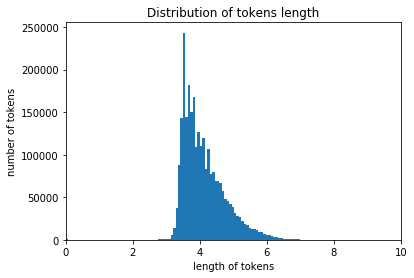

In [67]:
num_tokens_plt = [num if num !=0 else 1 for num in num_tokens]
print(num_tokens_plt)

plt.hist(np.log(num_tokens_plt), bins = 100)
plt.xlim((0,10))
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

In [49]:
# 取tokens平均值并加上两个tokens的标准差，
# 假设tokens长度的分布为正态分布，则max_tokens这个值可以涵盖95%左右的样本
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

232

In [50]:
# 取tokens的长度为236时，大约95%的样本被涵盖
# 我们对长度不足的进行padding，超长的进行修剪
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9590444500101375

**反向tokenize**  
我们定义一个function，用来把索引转换成可阅读的文本，这对于debug很重要。

In [51]:
# 用来将tokens转换为文本
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index2word[i]
        else:
            text = text + ' '
    return text

In [52]:
reverse = reverse_tokens(train_tokens_list[0])
reverse

'非常喜欢这个德国超市他家各类东东都品牌齐全 沃尔玛家乐福之类只有便宜货经常能找到一些讨人喜欢的东东比如梅子醋XO 有料的炖汤佐料当然还有偶最爱的各式冷冻海鲜和 大爱PS停车也超方便 四方坪常蹭他家免费停车位非常谢谢啦呵呵'

In [53]:
train_texts_orig[0] # 原始文本

'非常喜欢这个德国超市，他家各类东东都品牌齐全，不像沃尔玛、家乐福之类只有便宜货。经常能找到一些讨人喜欢的东东，比如梅子醋、XO酱、超有料的炖汤佐料，当然还有偶最爱的各式冷冻海鲜和Icecream，大爱。PS。停车也超方便，偶去四方坪常蹭他家免费停车位，非常谢谢啦，呵呵。\n'

In [70]:
embedding_dim = 300

num_words = 50000 # 只使用前50000个词

# 初始化 embedding_matrix，之后在keras上进行应用
embedding_matrix = np.zeros((num_words, embedding_dim))

# embedding_matrix为一个 [num_words，embedding_dim] 的矩阵，维度为 50000 * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')

# embedding_matrix的维度，这个维度为keras的要求，后续会在模型中用到
embedding_matrix.shape

(50000, 300)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

### padding（填充）和truncating（修剪）
我们把文本转换为tokens（索引）之后，每一串索引的长度并不相等，所以为了方便模型的训练我们需要把索引的长度标准化，上面我们选择了223这个可以涵盖95%训练样本的长度，接下来我们进行padding和truncating，我们一般采用'pre'的方法，这会在文本索引的前面填充0，因为根据一些研究资料中的实践，如果在文本索引后面填充0的话，会对模型造成一些不良影响

In [73]:
# 进行padding和truncating， 输入的train_tokens是一个list
# 返回的train_pad是一个numpy array
train_pad = pad_sequences(train_tokens_list, maxlen=max_tokens, padding='pre', truncating='pre')

In [74]:
# 超出五万个词向量的词用0代替
train_pad[train_pad>=num_words] = 0

# 可见padding之后前面的tokens全变成0，文本在最后面
train_pad[310]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [75]:
# 准备target向量，前2000样本为1，后2000为0
train_target = np.array(train_target)

In [76]:
# 进行训练和测试样本的分割
from sklearn.model_selection import train_test_split

In [77]:
# 90%的样本用来训练，剩余10%用来测试
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_target,
                                                    test_size=0.1,
                                                    random_state=12)

In [78]:
# 查看训练样本，确认无误
print(X_train[350])
print(reverse_tokens(X_train[350]))
print('class: ', y_train[350])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0  7698  5202   563     1  5498     0
 35815  1167     7   365   145     0  6848     0     1 22433   696 24540
 22552   684   500 43881     0   264 47740  1225  6307   189  7963   427
   138   115  1199 13878   120   189    19     0    98     0  2986    98
   109     0     1   449 13878    59 13309     8  6084   189  8568   142
    25   766  3759  1121     7     0    98  1154 24

### 用LSTM对样本进行分类

In [80]:
# 模型第一层为embedding
model = Sequential()
model.add(Embedding(num_words,embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_tokens,
                    trainable=False))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(LSTM(units=16, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 232, 300)          15000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 232, 128)          186880    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                9280      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 15,196,177
Trainable params: 196,177
Non-trainable params: 15,000,000
_________________________________________________________________


In [81]:
# 建立一个权重的存储点
path_checkpoint = 'sentiment_checkpoint.LSTM'

checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=True,
                                      save_best_only=True)
# 尝试加载已训练模型
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

Unsuccessful TensorSliceReader constructor: Failed to find any matching files for sentiment_checkpoint.LSTM


In [82]:
# 定义early stoping, 如果3个epoch内 validation loss 没有改善则停止训练
earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
# 自动降低learning rate
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_lr=1e-8, patience=0, verbose=1)
# 定义callback函数
callbacks = [
    earlystopping, 
    checkpoint,
    lr_reduction
]

In [84]:
# 开始训练
model.fit(X_train, y_train,
          validation_split=0.1, 
          epochs=5,
          batch_size=128,
          callbacks=callbacks)

Train on 2173313 samples, validate on 241480 samples
Epoch 1/5
2173312/2173313 [============================>.] - ETA: 0s - loss: 0.1206 - accuracy: 0.9535
Epoch 00001: val_loss improved from 0.12309 to 0.12029, saving model to sentiment_checkpoint.LSTM
2173313/2173313 [==============================] - 66904s 31ms/sample - loss: 0.1206 - accuracy: 0.9535 - val_loss: 0.1203 - val_accuracy: 0.9540
Epoch 2/5
2173312/2173313 [============================>.] - ETA: 0s - loss: 0.1163 - accuracy: 0.9551
Epoch 00002: val_loss improved from 0.12029 to 0.11993, saving model to sentiment_checkpoint.LSTM
2173313/2173313 [==============================] - 68210s 31ms/sample - loss: 0.1163 - accuracy: 0.9551 - val_loss: 0.1199 - val_accuracy: 0.9540
Epoch 3/5
2173312/2173313 [============================>.] - ETA: 0s - loss: 0.1126 - accuracy: 0.9563
Epoch 00003: val_loss did not improve from 0.11993

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
2173313/2173313 [